In [1]:
# 1->

# Import for pandas
import pandas as pd

# Read the training dataset where ; is the separator and label the columns as Input and Sentiment
df_train = pd.read_csv('dataset/train.txt', header=None, sep=';', names=['Input','Sentiment'], encoding='utf-8')
# Display the header
df_train.head()

,Input,Sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [2]:
# 2->

# Read the testing dataset where ; is the separator and label the columns as Input and Sentiment
df_test = pd.read_csv('dataset/test.txt', header = None, sep =';', names = ['Input','Sentiment'],encoding='utf-8')
# Display the header
df_test.head()

,Input,Sentiment
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [3]:
# 3->

# Display the unique values for column Sentiment
df_train.Sentiment.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

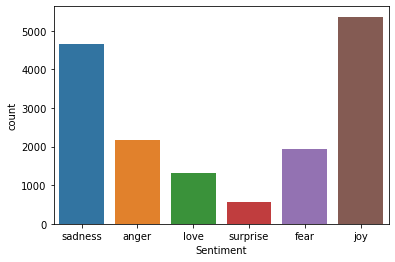

In [4]:
# 4->

# Import for seaborn
import seaborn as sns
# Countplot for Sentiment column in the training dataset
sns.countplot(x="Sentiment",data=df_train);

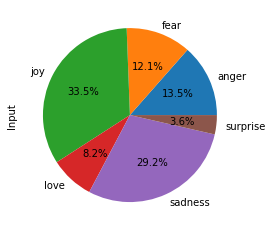

In [5]:
# 5->

# Group training data by Sentiment and get the counts
data = df_train.groupby("Sentiment")["Input"].count()
# Plot a pie chart of the data obtained
data.plot.pie(autopct="%.1f%%");

In [6]:
# 6->

# Import for Numpy
import numpy as np
# Display unique values for column Sentiment in the training dataset 
np.unique(df_train['Sentiment'])
# Perform Ordinal Encoding - assign integers to label based on categories
df_train['Sentiment'].replace("anger",0,inplace = True)
df_train['Sentiment'].replace("fear",1,inplace = True)
df_train['Sentiment'].replace("joy",2,inplace = True)
df_train['Sentiment'].replace("love",3,inplace = True)
df_train['Sentiment'].replace("sadness",4,inplace = True)
df_train['Sentiment'].replace("surprise",5,inplace = True)

In [7]:
# 7->

# Display the header for training data
df_train.head()

,Input,Sentiment
0,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,4
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,0


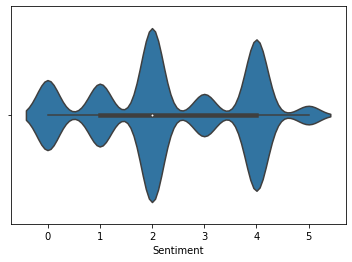

In [8]:
# 8->

# Violinplot for Sentiment column in the training dataset
sns.violinplot(x="Sentiment",data=df_train);

In [9]:
# 9->

# Display the column Sentiment from training data
df_train.Sentiment

0        4
1        4
2        0
3        3
4        0
        ..
15995    4
15996    4
15997    2
15998    0
15999    4
Name: Sentiment, Length: 16000, dtype: int64

In [10]:
# 10->

# Find the total rows with null values in training data
df_train.isnull().sum()

Input        0
Sentiment    0
dtype: int64

In [11]:
# 11->

# Information on training data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Input      16000 non-null  object
 1   Sentiment  16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [12]:
# 12->

# Description of training data
df_train.describe()

,Sentiment
count,16000.000000
mean,2.381063
std,1.444121
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,5.000000


In [13]:
# 13->

# Use column Input as independent variable
x = df_train["Input"]
# Use column Sentiment as dependent variable
y = df_train["Sentiment"]
# Display the dimensions of independent and dependent variables
print(x.shape,y.shape)

(16000,) (16000,)


In [14]:
# 14->

# Copy the contents of x to message
message = x.copy()
# Set vocabulary size to 10000
voc_size = 10000
# Display the first row of message - dependent variable
message[0]

'i didnt feel humiliated'

In [15]:
# 15->

# Import Regular Expressions
import re
# Import NLTK
import nltk
# Import stopwords from nltk.corpus
from nltk.corpus import stopwords
# Import PorterStemmer from nltk.stem.porter
from nltk.stem.porter import PorterStemmer

In [16]:
# 16->

# Create a new Porter stemmer
ps = PorterStemmer()
# Create a empty list
corpus = []
# Iterate over all messages
for i in range(0, len(message)):
    # Replace non-numeric characters with empty space and save as review
    review = re.sub('[^a-zA-Z]', ' ', message[i])
    # Convert to lower case
    review = review.lower()
    # Splits a string into a list
    review = review.split()
    # Perform stemming on non-stop words
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    # Takes all items in an iterable and joins them into one string
    review = ' '.join(review)
    # Append string to a list
    corpus.append(review)
# Display first element from the list
corpus[0]    

'didnt feel humili'

In [17]:
# 17->

# Import keras from tensorflow 
from tensorflow import keras
# Import One Hot Encoding from keras
from keras_preprocessing.text import one_hot
# Replace the elements with their one hot encoded characters of size voc_size
one_hot_representation = [one_hot(words,voc_size) for words in corpus]

# Display the one hot encoding of first element from the list
one_hot_representation[0]

[8790, 2208, 932]

In [18]:
# 18->

# Import pad_sequences from keras preprocessing
from keras_preprocessing.sequence import pad_sequences
# Set sentence length to 20
sent_length = 20
# Pre-pad the one hot encoding to make it of length sent_length
embedded_doc = pad_sequences(one_hot_representation,padding='pre',maxlen=sent_length)
# Display the padded sequence for first element from the list
embedded_doc[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0, 8790, 2208,  932])

In [19]:
# 19->

# Import Sequential from keras.models
from keras.models import Sequential
# Import Embedding, Dense, Dropout, LSTM, Bidirectional, Conv1D, GlobalMaxPooling1D frpm keras.layers
from keras.layers import Embedding, Dense, Dropout, LSTM, Bidirectional, Conv1D, GlobalMaxPooling1D
# Set dimension to 40
dimension = 40
# Convolution
kernel_size = 3
filters = 256

model = Sequential()
model.add(Embedding(voc_size,dimension,input_length=sent_length))
model.add(Conv1D(filters, kernel_size, activation='relu'))
model.add(GlobalMaxPooling1D())
#model.add(Bidirectional(LSTM(100)))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(1,activation='relu'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            400000    
                                                                 
 conv1d (Conv1D)             (None, 18, 256)           30976     
                                                                 
 global_max_pooling1d (Globa  (None, 256)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 256)               65792     
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 497,025
Trainable params: 497,025
Non-trainable params: 0
__________________________________________________

In [20]:
# 20->

from keras.models import Sequential
from keras.layers import Embedding,Dense,Dropout,LSTM,Bidirectional
dimension = 40
model = Sequential()
model.add(Embedding(voc_size,dimension,input_length=sent_length))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 40)            400000    
                                                                 
 bidirectional (Bidirectiona  (None, 200)              112800    
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 1)                 201       
                                                                 
Total params: 513,001
Trainable params: 513,001
Non-trainable params: 0
_________________________________________________________________


In [21]:
# 21->

final_input = np.array(embedded_doc)
final_output = np.array(y)

In [22]:
# 22->

# Import train_test_split
from sklearn.model_selection import train_test_split
# Split into train and test data
x_train, x_test, y_train, y_test = train_test_split(final_input, final_output, test_size=0.33, random_state=42)

In [23]:
# 23->

# Set batch size
batch_size = 256
# Set number of epochs
epochs = 6
# Fit the model on train data
hist = model.fit(x_train, y_train, 
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_data=(x_test,y_test))

Epoch 1/6
42/42 [==============================] - 9s 98ms/step - loss: 0.0000e+00 - accuracy: 0.1217 - val_loss: 0.0000e+00 - val_accuracy: 0.1203
Epoch 2/6
42/42 [==============================] - 3s 59ms/step - loss: 0.0000e+00 - accuracy: 0.1215 - val_loss: 0.0000e+00 - val_accuracy: 0.1203
Epoch 3/6
42/42 [==============================] - 3s 63ms/step - loss: 0.0000e+00 - accuracy: 0.1215 - val_loss: 0.0000e+00 - val_accuracy: 0.1203
Epoch 4/6
42/42 [==============================] - 2s 56ms/step - loss: 0.0000e+00 - accuracy: 0.1215 - val_loss: 0.0000e+00 - val_accuracy: 0.1203
Epoch 5/6
42/42 [==============================] - 2s 56ms/step - loss: 0.0000e+00 - accuracy: 0.1215 - val_loss: 0.0000e+00 - val_accuracy: 0.1203
Epoch 6/6
42/42 [==============================] - 2s 53ms/step - loss: 0.0000e+00 - accuracy: 0.1215 - val_loss: 0.0000e+00 - val_accuracy: 0.1203


In [24]:
# 24->

# Re-running the model for additional 6 epochs
hist = model.fit(x_train, y_train, 
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_data=(x_test,y_test))

Epoch 1/6
42/42 [==============================] - 2s 50ms/step - loss: 0.0000e+00 - accuracy: 0.1215 - val_loss: 0.0000e+00 - val_accuracy: 0.1203
Epoch 2/6
42/42 [==============================] - 2s 53ms/step - loss: 0.0000e+00 - accuracy: 0.1215 - val_loss: 0.0000e+00 - val_accuracy: 0.1203
Epoch 3/6
42/42 [==============================] - 2s 54ms/step - loss: 0.0000e+00 - accuracy: 0.1215 - val_loss: 0.0000e+00 - val_accuracy: 0.1203
Epoch 4/6
42/42 [==============================] - 2s 53ms/step - loss: 0.0000e+00 - accuracy: 0.1215 - val_loss: 0.0000e+00 - val_accuracy: 0.1203
Epoch 5/6
42/42 [==============================] - 2s 54ms/step - loss: 0.0000e+00 - accuracy: 0.1215 - val_loss: 0.0000e+00 - val_accuracy: 0.1203
Epoch 6/6
42/42 [==============================] - 2s 59ms/step - loss: 0.0000e+00 - accuracy: 0.1215 - val_loss: 0.0000e+00 - val_accuracy: 0.1203


In [25]:
# 25->

def suicide_avoider(x):
  ps=PorterStemmer()
  corpus=[]
  review=re.sub('[^a-zA-Z]',' ',x)
  review=review.lower()
  review=review.split()

  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)


  voc_size = 5000
  one_hot_r = [one_hot(word,voc_size) for word in corpus]

  max_length = 20
  embedded_docs = pad_sequences(one_hot_r,max_length,padding='pre')

  dimension = 40
  model = Sequential()
  model.add(Embedding(voc_size,dimension,input_length=max_length))
  model.add(Bidirectional(LSTM(100)))
  model.add(Dense(1,activation='softmax'))
  model.compile(loss = 'categorical_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])
  prediction= model.predict(np.array(embedded_docs))
  if prediction.all() ==0:
    print("person is angry")
  elif prediction.all() ==1:
    print("person is in fear")
  elif prediction.all() ==2:
    print("person is in joy")
  elif prediction.all() ==3:
    print("person is in love")
  elif prediction.all() ==4:
    print("person is sad")
  else:
    print("person is surprise")

In [26]:
# 26->

x = str(input('Enter sentence: '))
suicide_avoider(x)

Enter sentence: Will I get a job?
1/1 [==============================] - 1s 1s/step
person is in fear
